# New York Airbnb: Exploring Market Trends

New York City, is one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market Starting from 2019 to see what has changed as the years go by.

# Importing and cleaning the dataset

The first step is to import the Airbnb dataset that contains the full listing and apply some basic transformations to it. We will use Python to import the data, remove unnecessary columns, change the data type, and clean any errors.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def Airbnb_2024to2023():
    Dataset24_23 = pd.read_csv('Airbnb\April2023\Full Listing.csv')
    # Returns data points from February 6, 2023, to February 6, 2024, divided into four quarters
    return Dataset24_23

def Airbnb_2023to2022():
    Dataset23_22 = pd.read_csv('Airbnb\February2024\Full listings.csv')
    # Returns data points from April 5, 2022, to April 5, 2023, divided into four quarters
    return Dataset23_22   

def Airbnb_2019():
    Dataset2019 = pd.read_csv('Airbnb\AB_NYC_2019.csv')
    return Dataset2019

In [4]:
Airbnb_2024to2023().info()

C:\Users\eobay\AppData\Local\Temp\ipykernel_27556\3438122568.py:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  Dataset24_23 = pd.read_csv('Airbnb\April2023\Full Listing.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43241 entries, 0 to 43240
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            43241 non-null  int64  
 1   listing_url                                   43241 non-null  object 
 2   scrape_id                                     43241 non-null  int64  
 3   last_scraped                                  43241 non-null  object 
 4   source                                        43241 non-null  object 
 5   name                                          43229 non-null  object 
 6   description                                   42507 non-null  object 
 7   neighborhood_overview                         24954 non-null  object 
 8   picture_url                                   43241 non-null  object 
 9   host_id                                       43241 non-null 

In [5]:
def Select_Columns(Dataset):
    """
    This function takes a DataFrame as input and returns a new DataFrame with only the selected columns.
    .These columns are considered relevant for the analysis.
    """
    Dataset = Dataset[['id', 'name','description', 'host_id', 'host_name', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed','latitude',	'longitude','property_type','room_type','price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
    return Dataset


D2024= Select_Columns(Airbnb_2024to2023())
D2023 = Select_Columns(Airbnb_2023to2022())

C:\Users\eobay\AppData\Local\Temp\ipykernel_27556\3438122568.py:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  Dataset24_23 = pd.read_csv('Airbnb\April2023\Full Listing.csv')


In [8]:
def Replace_col_name(Dataset, old_name, new_name):
    """
    This function Changes the columns names in a dataframe.

    Args:
            dataset: Name of Dataset

            Old_name : The name of the Column to be replaced.
            
            New_Name : The string characters to be replaced in the column.

    Returns:
        The dataframe with the replaced values in the specified column.

        e.g: replace_values_in_column(Price_dataset(), 'price', 'Price')
    """
    Dataset = Dataset.rename(columns={old_name: new_name})
    return Dataset

# Replace Columns Name in 24-23 Dataset

In [9]:
Dataset = Replace_col_name(D2024, 'neighbourhood_cleansed', 'neighbourhood')
NewYork24 = Replace_col_name(Dataset, 'neighbourhood_group_cleansed', 'neighbourhood_group')
NewYork24


,id,name,description,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,765948794133787266,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,488760226,Eric,Canarsie,Brooklyn,40.64851,-73.89433,Private room in rental unit,Private room,$30.00,2,18,2023-03-19,4.46,2,9
1,13060365,Private Bedroom in 1800 Sq Ft loft,Quiet furnished private bedroom in a 5 BDR Tri...,5252741,Lindsey,Civic Center,Manhattan,40.71465,-74.00552,Private room in rental unit,Private room,$52.00,30,1,2016-07-10,0.01,1,0
2,13316028,Duplex Condo in Williamsburg- Pvt Ensuite Bath!,"A bright, airy hideaway located on the norther...",6459374,Juan,Greenpoint,Brooklyn,40.72635,-73.95431,Private room in condo,Private room,$120.00,30,9,2017-12-05,0.11,1,0
3,13308276,The Manhattan - Apartment Near Central Park,Only 1 block from Central Park and 2 blocks fr...,75085688,Mark,Upper West Side,Manhattan,40.80072,-73.96142,Entire rental unit,Entire home/apt,$150.00,30,10,2017-11-25,0.12,1,0
4,13355711,Private room in Washington Heights,You’ll love my place because of the neighborho...,39644709,Adriana,Washington Heights,Manhattan,40.85106,-73.93122,Private room in rental unit,Private room,$25.00,30,1,2016-07-31,0.01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43236,49018098,Private,Lleva a toda la familia a este fantástico luga...,393891728,Vanessa,Fresh Meadows,Queens,40.74752,-73.78080,Entire guest suite,Entire home/apt,$75.00,5,2,2023-03-29,2.00,1,243
43237,38088253,Quiet and Convenient 1BR in Flushing,The apartment is located a mere 3 blocks from ...,30272105,Joshua,Flushing,Queens,40.76304,-73.82087,Entire rental unit,Entire home/apt,$90.00,4,22,2023-03-28,0.51,1,63
43238,51839530,Room to Rent in two bedrooms Apartment,"Guest will have access to kitchen, living room...",387493702,Tara,Parkchester,Bronx,40.83685,-73.85900,Private room in rental unit,Private room,$91.00,2,3,2022-04-23,0.18,2,365
43239,565114924350358637,Un rinconcito en New York A cozy room inNew York,Hermosa y espaciosa habitación en área residen...,436672443,Carmen,Edenwald,Bronx,40.88855,-73.84011,Private room in home,Private room,$53.00,2,21,2023-03-25,1.57,1,352


# Replace Columns Name in 23-22 Dataset

In [10]:
Dataset = Replace_col_name(D2023, 'neighbourhood_cleansed', 'neighbourhood')
NewYork23 = Replace_col_name(Dataset, 'neighbourhood_group_cleansed', 'neighbourhood_group')
NewYork23

,id,name,description,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,977395984065981849,Home in Brooklyn · 1 bedroom · 1 bed · 1 bath,This unique place has a style all its own. Is ...,95344065,Derek,Sheepshead Bay,Brooklyn,40.591790,-73.942850,Private room in home,Private room,$30.00,31,1,03/01/2024,0.86,7,339
1,648033676238017128,Rental unit in Bronx · ★4.89 · 1 bedroom · 1 b...,Welcome to this beautiful cozy bedroom in a sp...,421601513,J Carlos Retals,Kingsbridge,Bronx,40.863940,-73.903120,Private room in rental unit,Private room,$30.00,30,18,26/12/2023,0.95,3,359
2,871990853610302281,Rental unit in Queens · ★New · 1 bedroom · Hal...,"Kick back and relax in this calm, open space.",484563208,Tricia,Howard Beach,Queens,40.663586,-73.834532,Private room in rental unit,Private room,$85.00,30,0,NaN,NaN,2,89
3,15943497,Home in Brooklyn · ★4.74 · 1 bedroom · 1 bed ·...,"Our home is steps away from train, 20 minutes ...",88043058,Pamela,Bedford-Stuyvesant,Brooklyn,40.689970,-73.954700,Private room in home,Private room,$50.00,30,185,09/10/2023,2.14,3,365
4,845596919658541172,Rental unit in Brooklyn · 4 bedrooms · 1 bed ·...,"- Huge furnished room, PRIVATE BATHROOM, TWO l...",3223938,Eugene,Flatbush,Brooklyn,40.652979,-73.957686,Private room in rental unit,Private room,$48.00,30,0,NaN,NaN,600,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39197,1061633200531291580,Hotel in Queens · ★New · 1 bedroom · 2 beds · ...,This Suite is our largest room in our hotel an...,544554359,John Hotel,Flushing,Queens,40.760290,-73.834370,Room in hotel,Private room,NaN,1,0,NaN,NaN,5,71
39198,932893071035345056,Condo in Brooklyn · 1 bedroom · 3 beds · 2.5 b...,"Come stay in a newly developed, modern duplex....",171636572,Keegan,Bushwick,Brooklyn,40.686800,-73.917210,Private room in condo,Private room,$135.00,2,0,NaN,NaN,1,89
39199,765951216153524797,Hotel in New York · 1 bedroom · 1 bed · 1 priv...,"Upscale luxury queen bed, with local views, fu...",202829797,Crystal,Murray Hill,Manhattan,40.748630,-73.971200,Room in hotel,Private room,NaN,30,0,NaN,NaN,3,365
39200,4352537,Condo in New York · ★4.69 · 2 bedrooms · 2 bed...,Come enjoy new york in this beautiful large pr...,22595345,Abel,Gramercy,Manhattan,40.735060,-73.981420,Entire condo,Entire home/apt,$230.00,30,58,03/12/2023,0.51,1,364


In [11]:
Dataset19 = Airbnb_2019()
Dataset19

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Airbnb24-23 Transformation

In [12]:
def get_data_info(Dataset):
    """
    This function returns the data types of the columns in a DataFrame.
    """
    return Dataset.info()
get_data_info(NewYork24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43241 entries, 0 to 43240
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43241 non-null  int64  
 1   name                            43229 non-null  object 
 2   description                     42507 non-null  object 
 3   host_id                         43241 non-null  int64  
 4   host_name                       43236 non-null  object 
 5   neighbourhood                   43241 non-null  object 
 6   neighbourhood_group             43241 non-null  object 
 7   latitude                        43241 non-null  float64
 8   longitude                       43241 non-null  float64
 9   property_type                   43241 non-null  object 
 10  room_type                       43241 non-null  object 
 11  price                           43241 non-null  object 
 12  minimum_nights                  

The DataFrame output reveals that there are 43,241 entries, each with 18 columns. These columns contain a variety of data types, including int64, float64, and object. It is also evident that certain columns ('name', 'description', 'host_name', 'last_review', and 'reviews_per_month') contain missing values. This is indicated by the discrepancy between the total number of entries (43,241) and the number of non-null values in these columns.


# Data Types
We can see that 'last_review' column contains dates, but it's type is object. There is a need to change it to a datetime data type. It'll allow to perform calculations on the dates. Columns 'neighbourhood_group', 'neighbourhood', and 'room_type' are categorical variables, so it'll be more appropriate to convert them from an object to a category type.

In [13]:
def to_datetime(Dataset, column):
    """
    This function converts a column in a DataFrame to a datetime object.
    """
    Dataset[column] = pd.to_datetime(Dataset[column])
    return Dataset
to_datetime(NewYork24, 'last_review')


,id,name,description,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,765948794133787266,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,488760226,Eric,Canarsie,Brooklyn,40.64851,-73.89433,Private room in rental unit,Private room,$30.00,2,18,2023-03-19,4.46,2,9
1,13060365,Private Bedroom in 1800 Sq Ft loft,Quiet furnished private bedroom in a 5 BDR Tri...,5252741,Lindsey,Civic Center,Manhattan,40.71465,-74.00552,Private room in rental unit,Private room,$52.00,30,1,2016-07-10,0.01,1,0
2,13316028,Duplex Condo in Williamsburg- Pvt Ensuite Bath!,"A bright, airy hideaway located on the norther...",6459374,Juan,Greenpoint,Brooklyn,40.72635,-73.95431,Private room in condo,Private room,$120.00,30,9,2017-12-05,0.11,1,0
3,13308276,The Manhattan - Apartment Near Central Park,Only 1 block from Central Park and 2 blocks fr...,75085688,Mark,Upper West Side,Manhattan,40.80072,-73.96142,Entire rental unit,Entire home/apt,$150.00,30,10,2017-11-25,0.12,1,0
4,13355711,Private room in Washington Heights,You’ll love my place because of the neighborho...,39644709,Adriana,Washington Heights,Manhattan,40.85106,-73.93122,Private room in rental unit,Private room,$25.00,30,1,2016-07-31,0.01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43236,49018098,Private,Lleva a toda la familia a este fantástico luga...,393891728,Vanessa,Fresh Meadows,Queens,40.74752,-73.78080,Entire guest suite,Entire home/apt,$75.00,5,2,2023-03-29,2.00,1,243
43237,38088253,Quiet and Convenient 1BR in Flushing,The apartment is located a mere 3 blocks from ...,30272105,Joshua,Flushing,Queens,40.76304,-73.82087,Entire rental unit,Entire home/apt,$90.00,4,22,2023-03-28,0.51,1,63
43238,51839530,Room to Rent in two bedrooms Apartment,"Guest will have access to kitchen, living room...",387493702,Tara,Parkchester,Bronx,40.83685,-73.85900,Private room in rental unit,Private room,$91.00,2,3,2022-04-23,0.18,2,365
43239,565114924350358637,Un rinconcito en New York A cozy room inNew York,Hermosa y espaciosa habitación en área residen...,436672443,Carmen,Edenwald,Bronx,40.88855,-73.84011,Private room in home,Private room,$53.00,2,21,2023-03-25,1.57,1,352


In [14]:
# This function converts a column in a DataFrame to a datetime object if the date is in the format 'dd/mm/yyyy'
def convert_to_datetime(Dataset, column):
    Dataset[column] = pd.to_datetime(Dataset[column], format='%d/%m/%Y', dayfirst=True)
    return Dataset

In [15]:
def Astype(Dataset, column, new_type):
    """
    This function changes the data type of a column in a DataFrame.
    """
    Dataset[column] = Dataset[column].astype(new_type)
    return Dataset


In [16]:


NewYork24_v2 = Astype(NewYork24, 'neighbourhood', 'category')
NewYork24_v3 = Astype(NewYork24_v2, 'neighbourhood_group', 'category')
NewYork24_v4 = Astype(NewYork24_v3, 'room_type', 'category')
NewYork24_v5 = Astype(NewYork24_v4, 'property_type', 'category')

# Price
Looking at the price column i already notice some things. firstly it has the dollar sign in it. this has caused the column it self to have a object datatype which allows it to handle both characters and numbers. if we want perform calculation to the price dataset we may want to remove the dollar sign and change the datatype.


In [17]:
# Remove White space an string characters
def replace_values_in_column(dataframe, column_name, string_to_replace, replace_with) -> pd.DataFrame:
    """
    This function Removes specific string characters from a column in a dataframe.

    Args:
            dataframe: The dataframe to be cleaned. Ensure that the dataframe has been imported before calling this function.

            column_name : The name of the column to be cleaned.
            
            string_to_replace : The string characters to be replaced in the column.

            replace_with : The string to replace the string characters with.

    Returns:
        The dataframe with the replaced values in the specified column.

        e.g: replace_values_in_column(Price_dataset(), 'Price', 'dollars', '')
    """
    dataframe[column_name] = dataframe[column_name].str.replace(string_to_replace, replace_with)
    return dataframe

# Now you can specify the string to replace when calling the function
# Remove non-numeric characters from the 'price' column
# Convert the 'price' column to string data type
NewYork24['price'] = NewYork24['price'].astype(str)

# Remove non-numeric characters from the 'price' column
Price = replace_values_in_column(NewYork24, 'price', '$', '')
Price = replace_values_in_column(Price, 'price', ',', '')

# Convert the 'price' column to float
Price['price'] = Price['price'].astype(float)
Price['price'] = Price['price'].astype(int)



# Catching Duplicate


In [18]:
NewYork24.duplicated().sum()
NewYork24.isnull().sum()

id                                    0
name                                 12
description                         734
host_id                               0
host_name                             5
neighbourhood                         0
neighbourhood_group                   0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10606
reviews_per_month                 10606
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Drop Columns with 10k null value

In [19]:
def Drop_Columns(Dataset, column):
    """
    This function drops columns from a DataFrame.
    """
    Dataset = Dataset.drop(columns=column)
    return Dataset

Newyork24 = Drop_Columns(NewYork24, 'last_review')
NewYorkdata24 = Drop_Columns(Newyork24, 'reviews_per_month')


# Fill NA

fill Missing values for the following columns, Name with 'Airbnb Listing', description with No 'Descripyion' and host_name with 'Airbnb Host'

In [20]:
def Fill_Null_values(Dataset, column, value):
    """
    This function fills null values in a DataFrame.
    """
    Dataset[column] = Dataset[column].fillna(value)
    return Dataset
Fill_Null_values(NewYorkdata24, 'name', 'Airbnb Listing')
Fill_Null_values(NewYorkdata24, 'description', 'No Description')
Fill_Null_values(NewYorkdata24, 'host_name', 'Airbnb Host')

,id,name,description,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,765948794133787266,Brooklyn Refuge,Take a break and unwind at this peaceful oasis.,488760226,Eric,Canarsie,Brooklyn,40.64851,-73.89433,Private room in rental unit,Private room,30,2,18,2,9
1,13060365,Private Bedroom in 1800 Sq Ft loft,Quiet furnished private bedroom in a 5 BDR Tri...,5252741,Lindsey,Civic Center,Manhattan,40.71465,-74.00552,Private room in rental unit,Private room,52,30,1,1,0
2,13316028,Duplex Condo in Williamsburg- Pvt Ensuite Bath!,"A bright, airy hideaway located on the norther...",6459374,Juan,Greenpoint,Brooklyn,40.72635,-73.95431,Private room in condo,Private room,120,30,9,1,0
3,13308276,The Manhattan - Apartment Near Central Park,Only 1 block from Central Park and 2 blocks fr...,75085688,Mark,Upper West Side,Manhattan,40.80072,-73.96142,Entire rental unit,Entire home/apt,150,30,10,1,0
4,13355711,Private room in Washington Heights,You’ll love my place because of the neighborho...,39644709,Adriana,Washington Heights,Manhattan,40.85106,-73.93122,Private room in rental unit,Private room,25,30,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43236,49018098,Private,Lleva a toda la familia a este fantástico luga...,393891728,Vanessa,Fresh Meadows,Queens,40.74752,-73.78080,Entire guest suite,Entire home/apt,75,5,2,1,243
43237,38088253,Quiet and Convenient 1BR in Flushing,The apartment is located a mere 3 blocks from ...,30272105,Joshua,Flushing,Queens,40.76304,-73.82087,Entire rental unit,Entire home/apt,90,4,22,1,63
43238,51839530,Room to Rent in two bedrooms Apartment,"Guest will have access to kitchen, living room...",387493702,Tara,Parkchester,Bronx,40.83685,-73.85900,Private room in rental unit,Private room,91,2,3,2,365
43239,565114924350358637,Un rinconcito en New York A cozy room inNew York,Hermosa y espaciosa habitación en área residen...,436672443,Carmen,Edenwald,Bronx,40.88855,-73.84011,Private room in home,Private room,53,2,21,1,352


# Outliers
 Outliers are data points that deviate substantially from the rest of the data and can potentially skew analysis results or model performance. Recognizing when maximum values are outliers helps in evaluating data quality and making informed decisions about whether to include, exclude, or address these outliers in the analysis
 
 We can use different methods to identify outliers, such as boxplots, and scatterplots, or mathematical techniques like the z-score or interquartile range (IQR). Once outliers are identified, they can be dealt with by removing them from the data set, adjusting them to more reasonable values, or treating them as a separate category during analysis.

In [21]:
NewYorkdata24.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.324100e+04,4.324100e+04,43241.000000,43241.000000,43241.000000,43241.000000,43241.000000,43241.000000,43241.000000
mean,2.343980e+17,1.535942e+08,40.728693,-73.943633,210.992091,18.205314,25.751648,29.372702,137.890567
std,3.433517e+17,1.632992e+08,0.057481,0.056330,830.087034,27.104094,56.798785,95.606464,139.718012
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.976631e+07,1.627932e+07,40.687610,-73.981660,79.000000,2.000000,1.000000,1.000000,0.000000
50%,4.418311e+07,7.665455e+07,40.724430,-73.952730,130.000000,10.000000,5.000000,1.000000,89.000000
75%,6.487532e+17,2.733130e+08,40.762510,-73.924200,216.000000,30.000000,24.000000,4.000000,279.000000
max,8.618914e+17,5.082663e+08,40.911380,-73.710870,99000.000000,1250.000000,1893.000000,543.000000,365.000000


Key Observation


Price: After analyzing the dataset, we noticed some inconsistencies and unpredictability. For instance, there is a minimum price of $0, which is unlikely as no one would rent out their place for that price. Additionally, the maximum price is almost 99000, which is too high for an Airbnb apartment. The standard deviation is also high, indicating that the prices are too spread out. This could be due to various factors such as location, amenities, and more.

Minimum Nights: Some cities and towns have restrictive policies on short-term rentals to protect housing for residents. In New York City, regulations apply to rentals of less than 30 days. We have noticed a maximum of 1250 days, which is way over the required days (75th percentile).

Number of Reviews: About 75 percent of the data points lie within a value of 24. However, there seems to be a maximum value of 1893, which is far beyond the other data points. This requires further investigation.

Calculated_host_listing_count: Typically, most hosts have around four listings as most data points fall below the 75th percentile value of four. However, there is one host with 543 listings, which is something worth exploring.


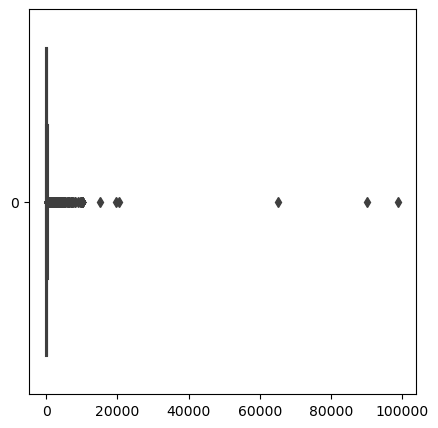

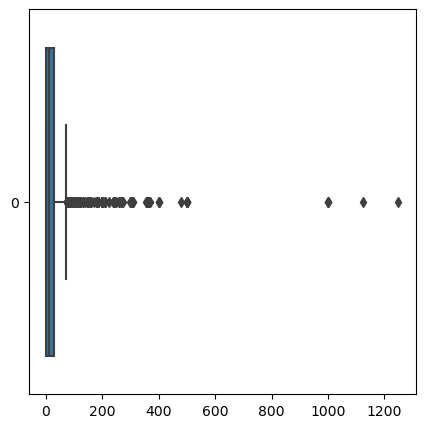

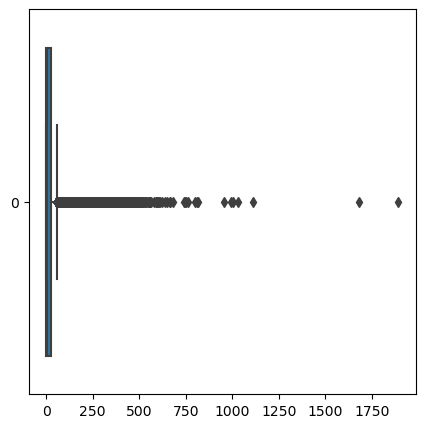

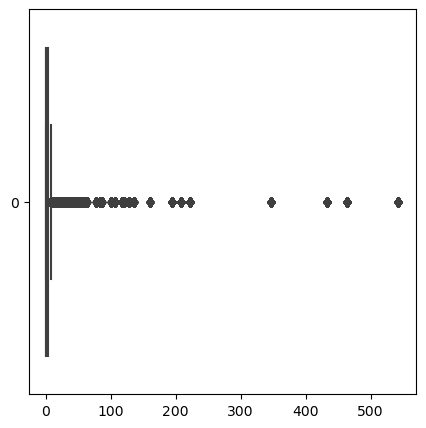

In [22]:
Outliers = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']
for col in Outliers:
    if col in NewYorkdata24.columns:
        plt.figure(figsize=(5, 5))
        sns.boxplot(NewYork24_v5[col], orient='h')
        plt.show()


# Should Outliers be Removed ?
I asked myself whether outliers should be removed from my dataset, but I couldn't find a valid justification for doing so. Removing them would mean losing almost 4343 rows of data, which could negatively impact the quality of my findings. Additionally, the outliers in the dataset appear to represent legitimate listings with unique circumstances. Although I would like to use statistical methods, this project focuses on the analytical part of the market. Therefore, I decided to split the dataset into three parts: the full dataset, the outlier dataset, and the dataset without outliers.

In [52]:
from scipy import stats
import numpy as np

# Select numeric columns
df_numeric = NewYorkdata24.select_dtypes(include=[np.number])

outlier_dataframes = {}

def zscore(df):
    # Select numeric columns
    df_numeric = df.select_dtypes(include=[np.number])

    outlier_dataframes = {}

    for col in df_numeric.columns:
        # Calculate z-score of the column
        z_score = np.abs(stats.zscore(df[col]))
        outliers_indices = np.where(z_score > 3)[0]
        outliers_num = len(outliers_indices)
        if outliers_num:
            outlier_dataframes[col] = df.iloc[outliers_indices]

    # Print the number of outliers instead of returning the dataframe
    for key, value in outlier_dataframes.items():
        print(f"Column: {key}, Number of Outliers: {len(value)}")

zscore(NewYorkdata24)


Column: latitude, Number of Outliers: 59
Column: longitude, Number of Outliers: 1157
Column: price, Number of Outliers: 124
Column: minimum_nights, Number of Outliers: 255
Column: number_of_reviews, Number of Outliers: 961
Column: calculated_host_listings_count, Number of Outliers: 1787


In [24]:
# Remove outliers from the dataset
z_scores = np.abs(stats.zscore(df_numeric))

# DataFrame without outliers
df_wo_outliers = NewYorkdata24[(z_scores < 3).all(axis=1)]
df_wo_outliers.shape

(38982, 16)

In [54]:
# Encapsulate all the functions into a single function called Data_pipeline

def Data_pipeline(Dataset):
    """
        Performs data cleaning and transformation on an Airbnb dataset.

        Args:
            dataset (pd.DataFrame): The input DataFrame containing Airbnb data.

        Returns:
            pd.DataFrame: The cleaned and transformed DataFrame.
        """
    # Select_Columns is a function that selects necessary columns from the dataset
    SelectColumns = Select_Columns(Dataset)
        
    # Renaming the columns for using a dictionary mapping.
    rename_map = {"neighbourhood_cleansed": "neighbourhood","neighbourhood_group_cleansed": "neighbourhood_group"}
    Rename_data = SelectColumns.rename(columns=rename_map)

    # Converting the 'last_review' column to a datetime object
    Date = ['last_review']
    for col in Date:
        Output = to_datetime(Rename_data, col)
    
    # Puts Columns to be converted to category in a list and uses a for loop to output the converted columns.
    Columns = ['neighbourhood', 'neighbourhood_group', 'room_type', 'property_type']
    for Col in Columns:
        Out_put = Astype(Output, Col, 'category')
  
    # Cleaning the 'price' column and converting its data type to 'float'. remove non-numeric characters from the 'price' column and
    # convert the 'price' column to float
    Price_converstion = Astype(Out_put, 'price', 'str')
    Remove_dollar_sign = replace_values_in_column(Price_converstion, 'price', '$', '')
    Remove_comma = replace_values_in_column(Remove_dollar_sign, 'price', ',', '')
    Convert_to_float = Astype(Remove_comma, 'price', 'float')
      
    # Converting the 'last_review' column to a datetime object
    drop_col = ['reviews_per_month']
    for drop in drop_col:
        Dropcolumn = Drop_Columns(Convert_to_float, drop)
    
    # Filling null values in certain columns with predefined values  
    NA = {'name': 'No Name', 'description': 'No Description', 'host_name': 'Airbnb Host'}
    for columns, values in NA.items():
        Fillnullvalues = Fill_Null_values(Dropcolumn, columns, values)

    # Convert the 'price' column to int
    Price_converstion = Astype(Fillnullvalues, 'price', 'int')
    # Return the final DataFrame
    return Price_converstion

# Use the function
z = Data_pipeline(Airbnb_2024to2023())


C:\Users\eobay\AppData\Local\Temp\ipykernel_27556\3438122568.py:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  Dataset24_23 = pd.read_csv('Airbnb\April2023\Full Listing.csv')


In [ ]:
Outliers = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']
for col in Outliers:
    if col in NewYorkdata24.columns:
        plt.figure(figsize=(5, 5))
        sns.boxplot(z[col], orient='h')
        plt.show()


In [26]:
def Data_pipeline2 (Dataset):
        """
        Performs data cleaning and transformation on an Airbnb dataset.

        Args:
            dataset (pd.DataFrame): The input DataFrame containing Airbnb data.

        Returns:
            pd.DataFrame: The cleaned and transformed DataFrame.
        """
        # Select_Columns is a function that selects necessary columns from the dataset
        SelectColumns = Select_Columns(Dataset)

        
        # Renaming the columns for using a dictionary mapping.
        rename_map = {"neighbourhood_cleansed": "neighbourhood","neighbourhood_group_cleansed": "neighbourhood_group"}
        Rename_data = SelectColumns.rename(columns=rename_map)
        
        # Puts Columns to be converted to category in a list and uses a for loop to output the converted columns.
        data_types = ['neighbourhood', 'neighbourhood_group', 'room_type', 'property_type']
        for DT in data_types:
                Out_put = Astype(Rename_data, DT, 'category')

        # Converting the 'last_review' column to a datetime object
        data_time = ['last_review']
        for date in data_time:
                Review = convert_to_datetime(Out_put, date)

        # Cleaning the 'price' column and converting its data type to 'float'. remove non-numeric characters from the 'price' column and
        # convert the 'price' column to float
        Price_converstion = Astype(Review, 'price', 'str')
        Remove_dollar_sign = replace_values_in_column(Price_converstion, 'price', '$', '')
        Remove_comma = replace_values_in_column(Remove_dollar_sign, 'price', ',', '')
        Convert_to_float = Astype(Remove_comma, 'price', 'float')
        
        # Dropping unnecessary columns from the dataset by putting them in a list and using a for loop to drop the columns.
        columns_to_drop = ['reviews_per_month']
        for column in columns_to_drop:
                Output = Drop_Columns(Convert_to_float , column)

        # Filling null values in certain columns with predefined values
        null_values_map = {'description': 'No Description', 'host_name': 'Airbnb Host', 'price': '0'}
        for column, value in null_values_map.items():
                Price_converstion = Fill_Null_values(Output, column, value)

        # Converting the 'price' column to 'int'.
        Price_converstion = Astype(Price_converstion, 'price', 'int')
        
        # Return the final DataFrame
        return Price_converstion

# Use the function
X = Data_pipeline2(Airbnb_2023to2022())
X.describe()   

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
count,3.920200e+04,3.920200e+04,39202.000000,39202.000000,39202.000000,39202.000000,39202.000000,27702,39202.000000,39202.000000
mean,3.241181e+17,1.611708e+08,40.729073,-73.946289,127.830391,29.634432,25.172440,2022-02-11 05:06:07.251461888,46.842661,151.142008
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,2011-05-12 00:00:00,1.000000,0.000000
25%,2.021553e+07,1.671337e+07,40.688770,-73.982870,0.000000,30.000000,0.000000,2020-03-11 00:00:00,1.000000,0.000000
50%,4.683017e+07,7.964657e+07,40.726230,-73.954241,69.000000,30.000000,4.000000,2023-08-05 00:00:00,1.000000,110.000000
75%,7.746345e+17,2.881116e+08,40.762500,-73.926990,150.000000,30.000000,22.000000,2023-11-15 00:00:00,6.000000,304.000000
max,1.084860e+18,5.597047e+08,40.911380,-73.713650,100000.000000,1250.000000,1887.000000,2024-02-09 00:00:00,827.000000,365.000000
std,4.185256e+17,1.739680e+08,0.056339,0.054813,796.812985,30.172981,58.097482,NaN,146.693303,145.985782


In [40]:
def Data_pipline3(Dataset):
    # Select Change Datatype Pipeline

    Columns = ['neighbourhood', 'neighbourhood_group', 'room_type']
    for col in Columns:
        output = Astype(Dataset, col, 'category')
               
    # Drop Columns Pipeline
    Columns_to_drop = ['reviews_per_month']
    for drop in Columns_to_drop:
        Dropcolumn = Drop_Columns(output, drop)
        
    return Dropcolumn
u = Data_pipline3(Airbnb_2019())


In [41]:
u.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [ ]:
Columns = ['latitude'	,'longitude'	,'price'	,'minimum_nights',	'number_of_reviews'	,'calculated_host_listings_count',	'availability_365']
for col in Columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(u[col], orient='h')
    plt.show()

In [65]:
from scipy import stats
import numpy as np

# Select numeric columns
df_numeric = NewYorkdata24.select_dtypes(include=[np.number])

outlier_dataframes = {}

def zscore(df):
    # Select numeric columns
    df_numeric = df.select_dtypes(include=[np.number])

    outlier_dataframes = {}

    for col in df_numeric.columns:
        # Calculate z-score of the column
        z_score = np.abs(stats.zscore(df[col]))
        outliers_indices = np.where(z_score > 3)[0]
        outliers_num = len(outliers_indices)
        if outliers_num:
            outlier_dataframes[col] = df.iloc[outliers_indices]

    # Print the number of outliers instead of returning the dataframe
    for key, value in outlier_dataframes.items():
        print(f"Column: {key}, Number of Outliers: {len(value)}")
print('2024-2023')
print('----------')
outlier_2024 = zscore(z)
print('----------------------------------------------------')
print('2023-2022')
print('----------')
outlier_2023 = zscore(X)
print('----------------------------------------------------')
print('2019')
print('----------')
outlier_2019 = zscore(u)


2024-2023
----------
Column: latitude, Number of Outliers: 59
Column: longitude, Number of Outliers: 1157
Column: price, Number of Outliers: 124
Column: minimum_nights, Number of Outliers: 255
Column: number_of_reviews, Number of Outliers: 961
Column: calculated_host_listings_count, Number of Outliers: 1787
----------------------------------------------------
2023-2022
----------
Column: latitude, Number of Outliers: 80
Column: longitude, Number of Outliers: 1022
Column: price, Number of Outliers: 69
Column: minimum_nights, Number of Outliers: 252
Column: number_of_reviews, Number of Outliers: 859
Column: calculated_host_listings_count, Number of Outliers: 1427
----------------------------------------------------
2019
----------
Column: latitude, Number of Outliers: 99
Column: longitude, Number of Outliers: 1236
Column: price, Number of Outliers: 388
Column: minimum_nights, Number of Outliers: 327
Column: number_of_reviews, Number of Outliers: 1221
Column: calculated_host_listings_coun